In [86]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn
from itertools import product
import datetime
import scikitplot as skplt

# data transformation & splitting
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz

# logistic
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ensemble methods, MLP
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

#neural network 
import keras
from keras.models import Sequential
from keras.layers import Dense

#------------------------------------------------------------------------------------------ 



In [87]:
train = pd.read_csv("/Users/buiminhchi/Dev/kho/standard_dataset/train.csv", sep = ',', index_col = 'id')
train_df = pd.DataFrame(train)
val = pd.read_csv("/Users/buiminhchi/Dev/kho/standard_dataset/val.csv", sep = ',', index_col = 'id')
val_df = pd.DataFrame(val)
test = pd.read_csv("/Users/buiminhchi/Dev/kho/standard_dataset/test.csv", sep = ',', index_col = 'id')
test_df = pd.DataFrame(test)
# print(dataframe)
pd.options.display.float_format = '{:,.2f}'.format
display(train_df)
display(val_df)
display(test_df)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,17474,1,156,56.00,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79879,21276,1,165,81.00,120,80,1,1,0,0,1,1
79881,19144,2,176,85.00,140,88,1,3,1,0,0,1
79882,18286,1,148,49.00,100,60,1,1,0,0,1,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
79886,21112,1,158,71.00,120,80,1,1,0,0,1,0
79887,18185,1,180,70.00,150,100,1,1,0,0,1,1
79888,22386,2,176,75.00,120,80,1,1,0,0,1,1
79889,16569,1,167,72.00,140,80,1,1,0,0,1,1
79890,18936,1,155,62.00,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89958,22526,1,156,56.00,140,90,3,1,0,0,1,1
89961,15779,1,158,55.00,110,70,1,1,0,0,0,0
89963,20441,1,149,71.00,140,90,2,1,0,0,1,1


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
89968,15226,1,158,55.00,110,70,1,1,0,0,0,0
89969,14594,1,159,89.00,143,103,1,1,0,0,1,0
89970,16004,1,162,69.00,110,80,1,1,0,0,1,0
89972,20506,2,164,68.00,110,80,1,1,0,0,1,0
89973,17489,2,168,65.00,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.00,120,80,1,1,1,0,1,0
99995,22601,1,158,126.00,140,90,2,2,0,0,1,1
99996,19066,2,183,105.00,180,90,3,1,0,1,0,1


In [88]:
# convert age from days to years
train_df['age'] = train_df['age']/365
val_df['age'] = val_df['age']/365
test_df['age'] = test_df['age']/365

# convert gender to 0=female and 1=male
train_df['gender'] = train_df['gender'] - 1
val_df['gender'] = val_df['gender'] - 1
test_df['gender'] = test_df['gender'] - 1

# calculate BMI
train_df['BMI'] = train_df['weight']/(np.power(train_df['height']/100, 2))
val_df['BMI'] = val_df['weight']/(np.power(val_df['height']/100, 2))
test_df['BMI'] = test_df['weight']/(np.power(test_df['height']/100, 2))

# remove BMI > 150
# drop_criteria_bmi_train = train_df[train_df['BMI'] > 150].index
# drop_criteria_bmi_val = val_df[val_df['BMI'] > 150].index
# drop_criteria_bmi_test = test_df[test_df['BMI'] > 150].index

# number of records to be removed
print(drop_criteria_bmi_train.size)
print(drop_criteria_bmi_val.size)
print(drop_criteria_bmi_test.size)

# remove records
# train_df.drop(drop_criteria_bmi_train, inplace = True)
# val_df.drop(drop_criteria_bmi_val, inplace = True)
# test_df.drop(drop_criteria_bmi_test, inplace = True)

10
1
2


In [89]:
# explanatory variables
x_train = train_df.drop(columns = ['cardio', 'BMI'])
x_val = val_df.drop(columns = ['cardio', 'BMI'])
x_test = test_df.drop(columns = ['cardio', 'BMI'])
# response variable
y_train = train_df['cardio']
y_val = val_df['cardio']
y_test = test_df['cardio']


In [90]:
# RobustScaler ALL variables
# scaler = RobustScaler()
# scaler.fit(x_train)
# x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
# x_val = pd.DataFrame(scaler.transform(x_val), index=x_val.index, columns=x_val.columns)
# x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

# pd.options.display.float_format = '{:,.4f}'.format
# display(x_train.head(5))
# display(x_train.describe())
# print(x_train)

In [91]:
t1 = datetime.datetime.now()
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier()
my_tree.fit(x_train, y_train)
y_train_pre = my_tree.predict(x_train)
t2 = datetime.datetime.now()

In [92]:
print( t2 -t1)

0:00:00.275008


In [93]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [94]:
#test
t11 = datetime.datetime.now()
y_test_pred = my_tree.predict(x_test)
t22 = datetime.datetime.now()
time_test = t22 - t11

In [95]:
print(time_test)

0:00:00.005947


In [96]:
from sklearn.metrics import accuracy_score
accuracy_score_train = accuracy_score(y_train, y_train_pre)
accuracy_score_test = accuracy_score(y_test, y_test_pred)
print("accuracy_score_train: ",accuracy_score_train)
print("accuracy_score_test: ",accuracy_score_test)

accuracy_score_train:  0.9998035714285715
accuracy_score_test:  0.6307142857142857


In [97]:
classes=['0','1']
print(classification_report(y_train, y_train_pre, target_names=classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28029
           1       1.00      1.00      1.00     27971

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



In [98]:
classes=['0','1']
print(classification_report(y_test, y_test_pred, target_names=classes))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      3478
           1       0.63      0.63      0.63      3522

    accuracy                           0.63      7000
   macro avg       0.63      0.63      0.63      7000
weighted avg       0.63      0.63      0.63      7000



In [99]:
# y_true = y_val
# y_pred = model.predict_classes(x_val)
# confusion_matrix(y_true, y_pred)
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix: 
 [[28029     0]
 [   11 27960]]


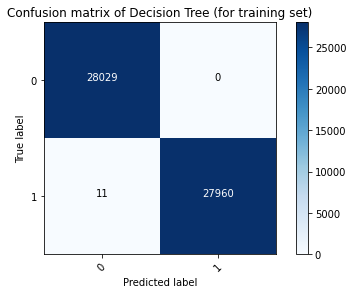

In [100]:
y_true = y_train
y_pred = y_train_pre
cm_train = confusion_matrix(y_true, y_pred) 
print('Confusion matrix: \n', cm_train)
plot_confusion_matrix(cm_train, classes=['0','1'],
                      title='Confusion matrix of Decision Tree (for training set)')

Confusion matrix: 
 [[2197 1281]
 [1304 2218]]


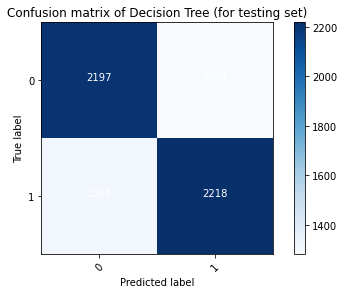

In [101]:
y_true = y_test
y_pred = y_test_pred
cm_test = confusion_matrix(y_true, y_pred) 
print('Confusion matrix: \n',cm_test)
plot_confusion_matrix(cm_test, classes=['0','1'],
                      title='Confusion matrix of Decision Tree (for testing set)')


In [102]:
prediction = y_test_pred
res = pd.DataFrame(prediction)
res.index = x_test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("/Users/buiminhchi/Dev/kho/standard_dataset/Decisiontree + RandomForest/pred_DecesionTree.csv")
# print(df.to_csv(prediction_logistic_model.csv))


In [103]:
# from scipy import misc
# import io
# import graphviz
# features = ["age",  "gender",  "height" , "weight",  "ap_hi",  "ap_lo",  "cholesterol",  "gluc",  "smoke", "alco",  "active"]
# def show_tree(tree, features,path):
#     f = io.StringIO()
#     export_graphviz(tree, out_file = f, feature_name = features)
#     img = misc.imread(path)
#     plt.rcParams["figure.figsize"] = (20,20)
#     plt.imshow(img)

In [104]:
# show_tree(my_tree,features,'dec_tree.jpg')

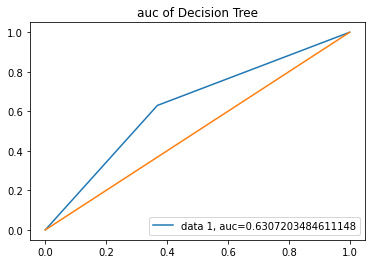

In [105]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1])
plt.title('auc of Decision Tree')
plt.legend(loc=4)
plt.show()